In [1]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


reviews_train = load_files('data/aclImdb/train')
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b"") for doc in text_train]

reviews_test = load_files('data/aclImdb/test')
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b'<br />', b'') for doc in text_test]

In [2]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [3]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0)

document_topics= lda.fit_transform(X)

In [4]:
print(lda.components_.shape)

(10, 10000)


In [6]:
import numpy as np
import pandas as pd
import mglearn as mg
import matplotlib.pyplot as plt
from IPython.display import display

In [7]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

In [8]:
mg.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, 
                      topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
comedy        role          show          didn          action        
cast          john          funny         10            series        
role          wife          worst         thought       effects       
performance   plays         thing         saw           original      
funny         young         want          lot           game          
plays         played        nothing       again         fight         
played        performance   money         though        special       
actor         cast          didn          am            star          
john          murder        actually      got           fi            
performances  james         re            actors        sci           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
musi

In [9]:

lda100 = LatentDirichletAllocation(n_components=100,
                                   learning_method='batch', max_iter=25, random_state=0)

document_topics100= lda100.fit_transform(X)

In [10]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [12]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mg.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, 
                      topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
cast          play          funny         opera         gay           
role          davis         comedy        soap          drugs         
actors        role          laugh         johnny        young         
director      shakespeare   jokes         carter        point         
performance   actor         humor         mummy         pokemon       
actor         performance   hilarious     ryan          fantasy       
played        stage         fun           drama         during        
script        howard        laughs        gina          us            
actress       plays         funniest      tomb          between       
roles         branagh       re            nothing       aids          
supporting    bette         comedies      tv            dark          
performances  hamlet        isn           bonham        men           
plays 

In [13]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b'.'.join(text_train[i].split(b".")[:2]) + b".\n")

b'In the winter of 1931, supposedly 12-year-old Tyler Hoechlin (as Michael Sullivan Jr.) wonders what his mobster father Tom Hanks (Michael "Mike" Sullivan) does for a living.\n'
b"WWE's last PPV of 2006, proved to be a hit with the fans, but for one reason only, the ladder match which was only scheduled to be Paul London and Brian Kendrick against William Regal and Dave Taylor. But with the recent crap PPV being December to Dismember, WWE knew that it had to do something to get the fans talking again, this proved useful when it introduced MNM and The Hardy Boyz to the mix and announced that the match was going to be a ladder match.\n"
b'This is an excellent film!Tom Hanks and Paul Newman performed great!I was really surprised when Newman was beating on his son!That was a great scene and the shooting scenes were staged good.I was very surprised about the end.\n'
b"Was'nt really bad for Raw's first PPV of 006. But the ending was really really shocking to everyone in attendance & the one

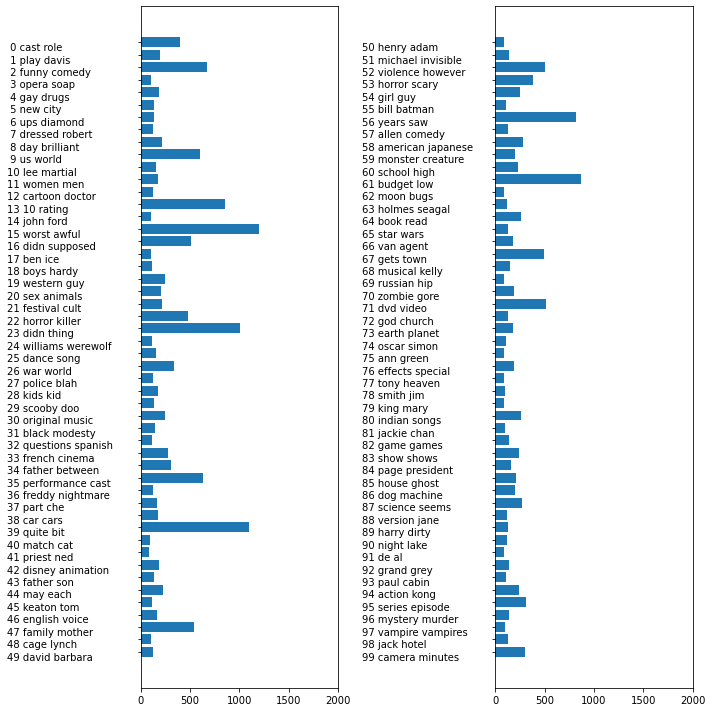

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
              for i, words in enumerate(feature_names[sorting[:, :2]])]

for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    
plt.tight_layout()